In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr

pd.set_option('display.max_columns',None)
beans=pd.read_csv('orders_clean.csv',low_memory=False)
beans.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Profit,Weekday,Month,Year,Revenue
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Robusta,Medium,1.0,9.950,0.5970,Thursday,9,2019,19.90
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Excelsa,Medium,0.5,8.250,0.9075,Thursday,9,2019,41.25
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Arabica,Light,1.0,12.950,1.1655,Thursday,6,2021,12.95
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Excelsa,Medium,1.0,13.750,1.5125,Thursday,7,2021,27.50
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Robusta,Light,2.5,27.485,1.6491,Thursday,7,2021,54.97


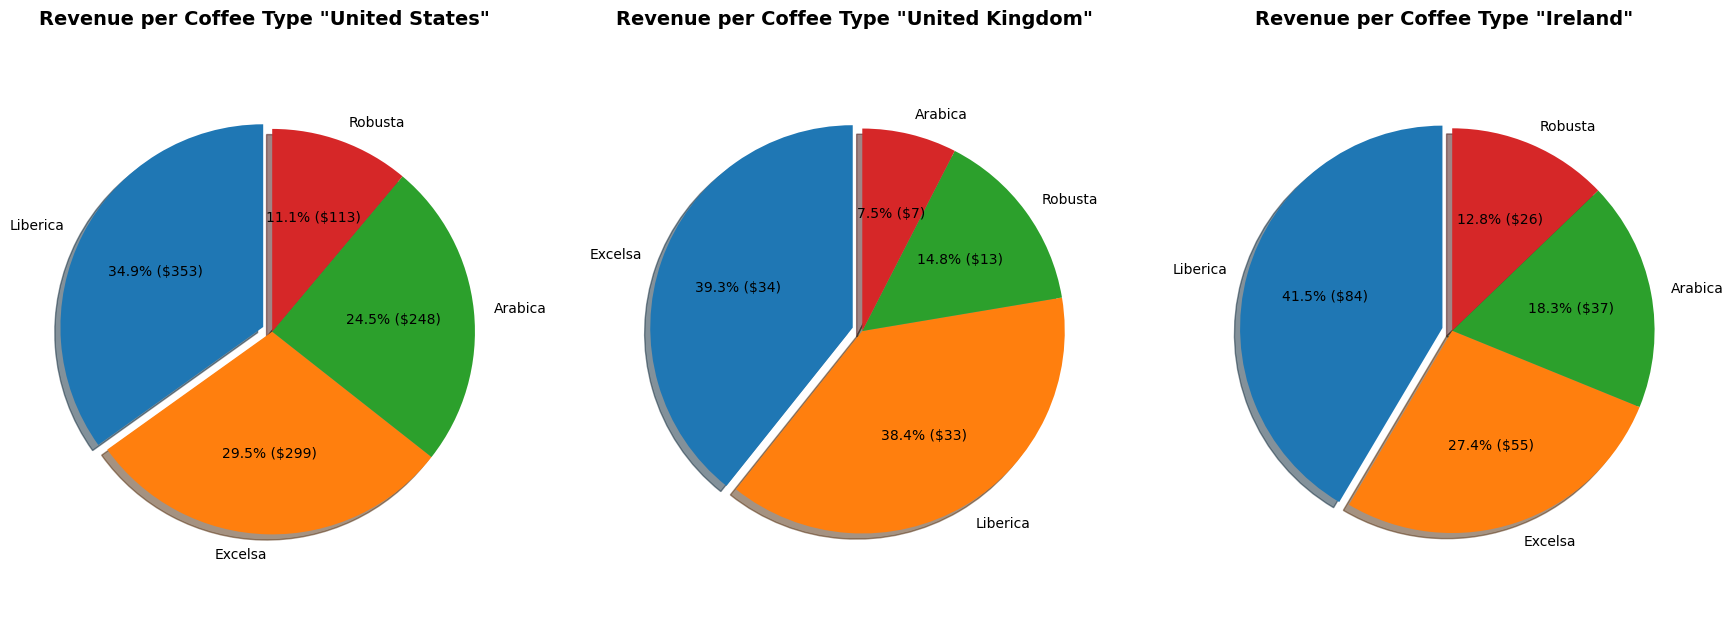

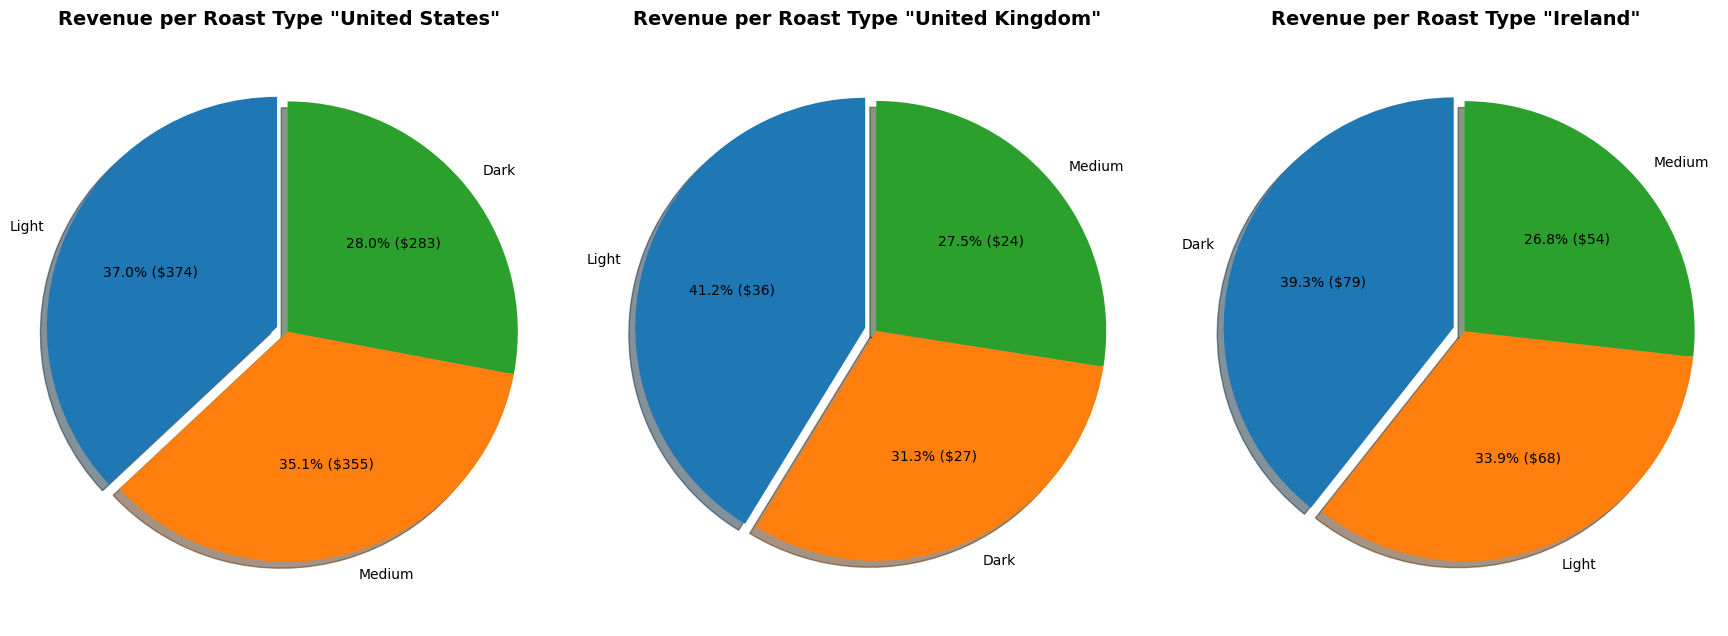

C:\Users\mec_s\AppData\Local\Temp\ipykernel_2724\3345351124.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email['Domain'] = email['Email'].str.split('@').str[1]


<Figure size 1200x800 with 0 Axes>

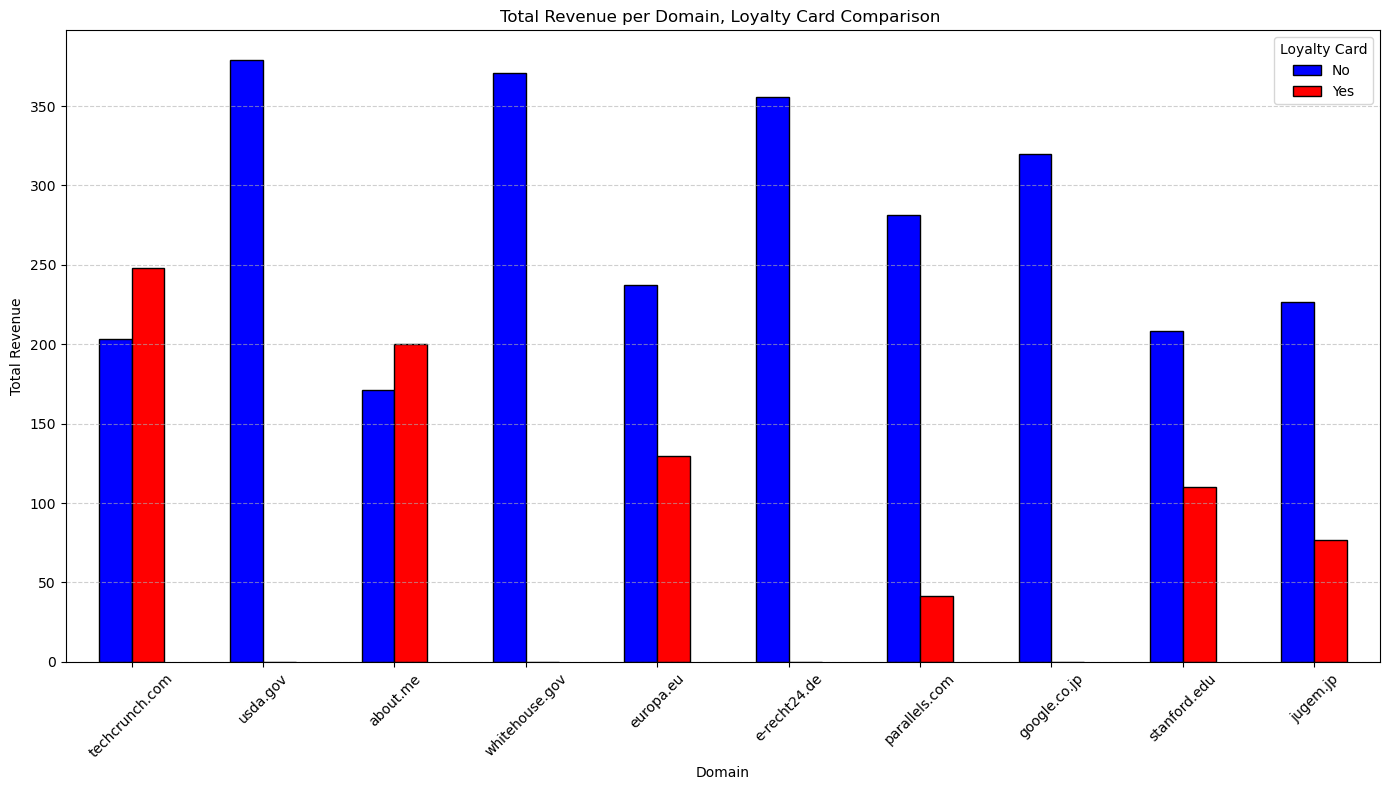

In [87]:
pd.set_option('display.max_columns',None)
beans=pd.read_csv('orders_clean.csv',low_memory=False)
beans.head()

# Revenue per Coffee Type

usa=beans[beans['Country']=='United States'].groupby(['Coffee Type'])['Profit'].agg('sum').sort_values(ascending=False)
uk=beans[beans['Country']=='United Kingdom'].groupby(['Coffee Type'])['Profit'].agg('sum').sort_values(ascending=False)
ireland=beans[beans['Country']=='Ireland'].groupby(['Coffee Type'])['Profit'].agg('sum').sort_values(ascending=False)

data_to_plot = [
    (usa, 'United States'),
    (uk, 'United Kingdom'),
    (ireland, 'Ireland')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 7)) 

for i, (country_data, country_name) in enumerate(data_to_plot):
    
    labels = country_data.index
    sizes = country_data.values
    total_revenue = country_data.sum()
    
    explode = [0.05 if size == max(sizes) else 0 for size in sizes]
    
    wedges, texts, autotexts = axes[i].pie(
        sizes,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',    
        shadow=True,
        startangle=90,
        textprops=dict(color="black")
    )
    
    for j, autotext in enumerate(autotexts):
        absolute_value = f' (${sizes[j]:,.0f})' 
        autotext.set_text(autotext.get_text() + absolute_value)
        
    axes[i].set_title(
        f'Revenue per Coffee Type "{country_name}" ', 
        fontsize=14, 
        fontweight='bold'
    )
    axes[i].axis('equal') 
    
plt.tight_layout(pad=3.0) 
plt.show()

# Revenue per Roast Type

usa=beans[beans['Country']=='United States'].groupby(['Roast Type'])['Profit'].agg('sum').sort_values(ascending=False)
uk=beans[beans['Country']=='United Kingdom'].groupby(['Roast Type'])['Profit'].agg('sum').sort_values(ascending=False)
ireland=beans[beans['Country']=='Ireland'].groupby(['Roast Type'])['Profit'].agg('sum').sort_values(ascending=False)

data_to_plot = [
    (usa, 'United States'),
    (uk, 'United Kingdom'),
    (ireland, 'Ireland')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 7)) 

for i, (country_data, country_name) in enumerate(data_to_plot):
    
    labels = country_data.index
    sizes = country_data.values
    total_revenue = country_data.sum()
    
    explode = [0.05 if size == max(sizes) else 0 for size in sizes]
    
    wedges, texts, autotexts = axes[i].pie(
        sizes,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',    
        shadow=True,
        startangle=90,
        textprops=dict(color="black")
    )
    
    for j, autotext in enumerate(autotexts):
        absolute_value = f' (${sizes[j]:,.0f})' 
        autotext.set_text(autotext.get_text() + absolute_value)
        
    axes[i].set_title(
        f'Revenue per Roast Type "{country_name}" ', 
        fontsize=14, 
        fontweight='bold'
    )
    axes[i].axis('equal') 
    
plt.tight_layout(pad=3.0) 
plt.show()

#  Total Revenue per Domain, Loyalty Card Comparison

email=beans.dropna(subset=['Email'])
email['Domain'] = email['Email'].str.split('@').str[1]
email.groupby('Domain')['Revenue'].agg('sum').sort_values(ascending=False).head(10)
top_dom = email.groupby('Domain')['Revenue'].agg('sum').sort_values(ascending=False).head(10).index.tolist()
top_10 = email[email['Domain'].isin(top_dom)].copy()
grouped=top_10.groupby(['Domain','Loyalty Card'])['Revenue'].agg('sum').sort_values(ascending=False)

grouped.index.names = ['Domain', 'Loyalty Card']

df_unstacked = grouped.unstack(level='Loyalty Card', fill_value=0)

df_unstacked['Total_Revenue'] = df_unstacked['No'] + df_unstacked['Yes']

df_sorted = df_unstacked.sort_values(by='Total_Revenue', ascending=False)

df_plot = df_sorted.drop(columns=['Total_Revenue'])

plt.figure(figsize=(12, 8))

ax = df_plot.plot.bar(
    figsize=(14, 8),
    rot=45,
    title='Total Revenue per Domain, Loyalty Card Comparison ',

    color={'No': 'blue', 'Yes': 'red'},
    edgecolor='black'
)

plt.xlabel('Domain')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Loyalty Card')
plt.tight_layout()
plt.show()

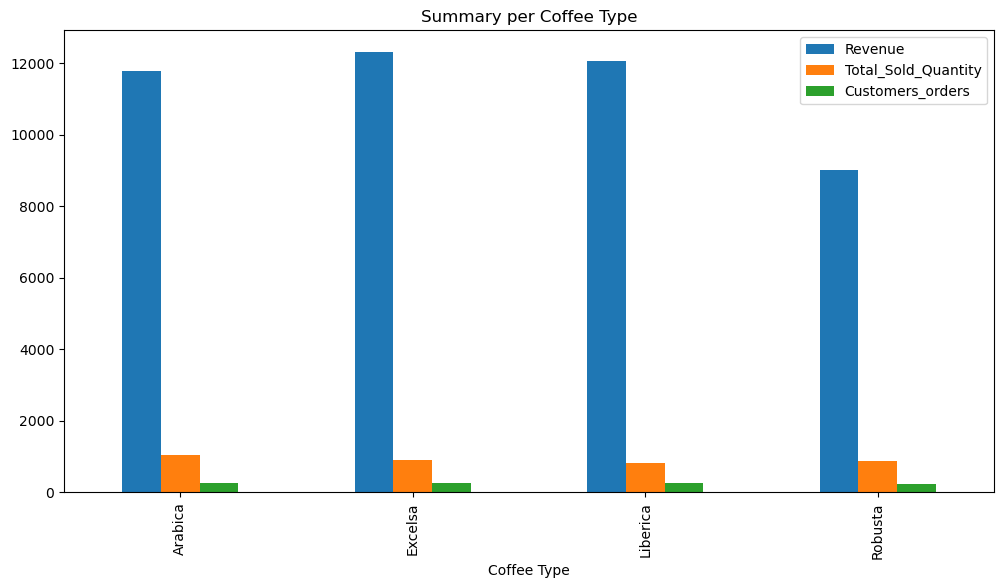

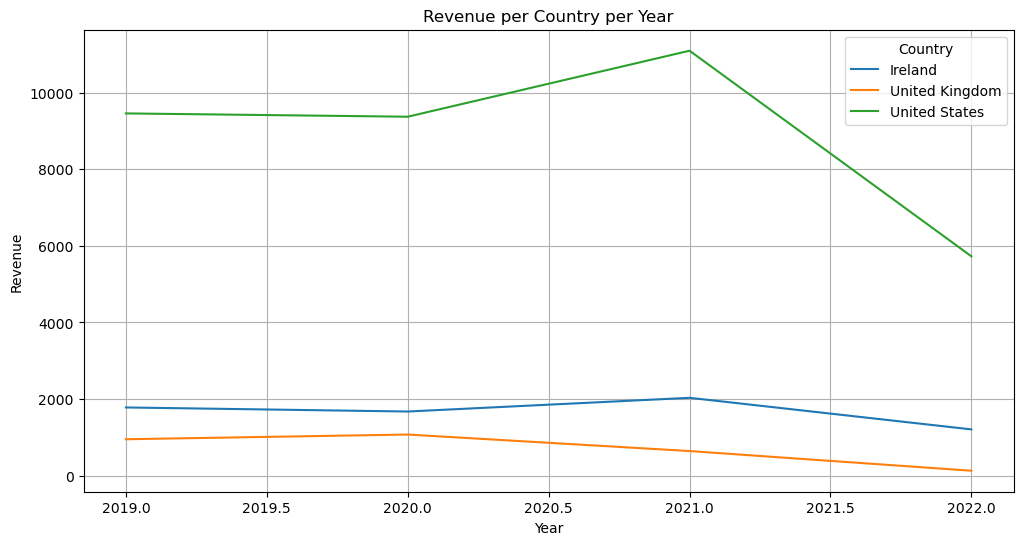

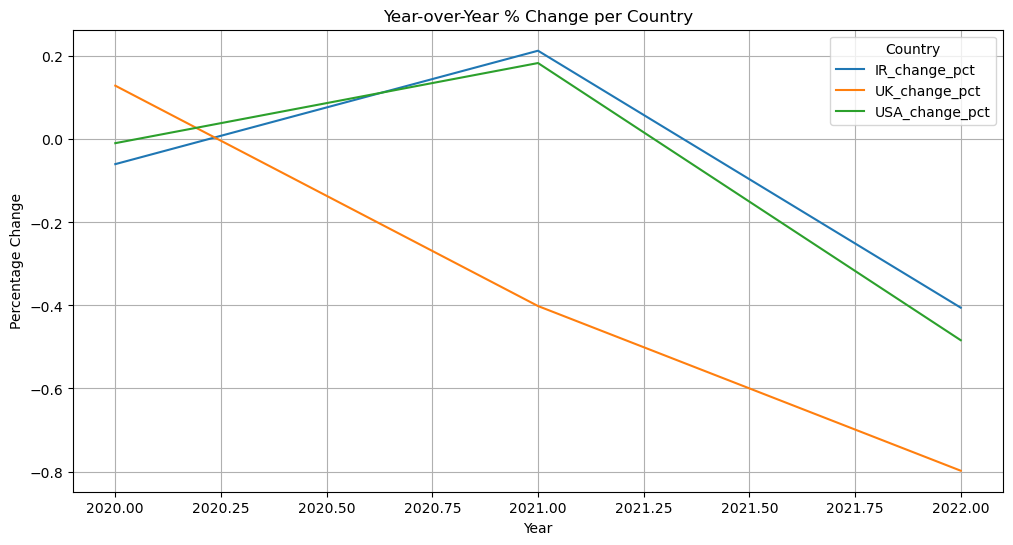

In [81]:
df=pd.read_csv('Thanos_Dataset.csv',low_memory=False)
df_coffee = df.groupby('Coffee Type').agg({
    'Revenue':'sum',
    'Total_Sold_Quantity': 'sum',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Customers_orders'})

df_coffee.plot(kind='bar', figsize=(12,6))
plt.title('Summary per Coffee Type')
plt.xlabel('Coffee Type')
plt.show()


table_country = pd.pivot_table(df,
                       index='Country',
                       columns='Coffee Type',
                       values='Revenue',
                       aggfunc='sum')

table_country

table_country = pd.pivot_table(df,
                       index=['Year'],
                       columns='Country',
                       values='Revenue',
                       aggfunc='sum')

table_country.reset_index()

table_country['Ireland_shifted'] = table_country['Ireland'].shift(1)
table_country['UK_shifted'] = table_country['United Kingdom'].shift(1)
table_country['USA_shifted'] = table_country['United States'].shift(1)

table_country['IR_change_pct'] = (table_country['Ireland'] - table_country['Ireland_shifted']) / (table_country['Ireland_shifted'])
table_country['UK_change_pct'] = (table_country['United Kingdom'] - table_country['UK_shifted']) / (table_country['UK_shifted'])
table_country['USA_change_pct'] = (table_country['United States'] - table_country['USA_shifted']) / (table_country['USA_shifted'])

table_country

# Select only revenue columns (no shifted / pct cols)
rev_cols = ['Ireland', 'United Kingdom', 'United States']

table_country[rev_cols].plot(kind='line', figsize=(12,6))

plt.title('Revenue per Country per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

pct_cols = ['IR_change_pct', 'UK_change_pct', 'USA_change_pct']

table_country[pct_cols].plot(kind='line', figsize=(12,6))

plt.title('Year-over-Year % Change per Country')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card,Coffee Type,Roast Type,Size,Unit Price,Profit,Weekday,Month,Year,Revenue,Week Day Number,Month Name
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Robusta,Medium,1.0,9.950,0.59700,Thursday,9,2019,19.900,4,September
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes,Excelsa,Medium,0.5,8.250,0.90750,Thursday,9,2019,41.250,4,September
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes,Arabica,Light,1.0,12.950,1.16550,Thursday,6,2021,12.950,4,June
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Excelsa,Medium,1.0,13.750,1.51250,Thursday,7,2021,27.500,4,July
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No,Robusta,Light,2.5,27.485,1.64910,Thursday,7,2021,54.970,4,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-01-06,43014-53743-XK,R-L-2.5,1,Jennica Tewelson,jtewelsonrn@samsung.com,+1 (469) 573-8379,4040 Hoard Junction,Dallas,United States,75210,No,Robusta,Light,2.5,27.485,1.64910,Monday,1,2020,27.485,1,January
996,AEZ-13242-456,2022-05-04,62494-09113-RP,R-M-0.5,5,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Robusta,Medium,0.5,5.970,0.35820,Wednesday,5,2022,29.850,3,May
997,UME-75640-698,2019-10-11,62494-09113-RP,A-M-0.5,4,Marguerite Graves,NaN,+1 (479) 204-9111,91413 Scott Way,Fort Smith,United States,72905,No,Arabica,Medium,0.5,6.750,0.60750,Friday,10,2019,27.000,5,October
998,GJC-66474-557,2021-08-03,64965-78386-MY,A-D-1,1,Nicolina Jenny,njennyrq@bigcartel.com,+1 (562) 679-4750,6099 American Ash Court,Whittier,United States,90610,No,Arabica,Dark,1.0,9.950,0.89550,Tuesday,8,2021,9.950,2,August


Revenue
Year Month Month Name          
2019 1     January      828.985
     2     February     987.405
     3     March       1021.140
     4     April       1680.750
     5     May          398.565
     6     June        1384.680
     7     July        1004.135
     8     August       706.345
     9     September   1277.020
     10    October      884.970
     11    November     823.385
     12    December    1189.785
2020 1     January      566.950
     2     February    1798.340
     3     March        914.790
     4     April        761.810
     5     May          939.355
     6     June        1438.440
     7     July        1308.945
     8     August       300.400
     9     September    713.050
     10    October     1514.705
     11    November    1108.865
     12    December     751.895
2021 1     January      837.685
     2     February     958.830
     3     March       1544.640
     4     April       1005.585
     5     May          907.690
     6     June         864.530
     7     July         763.105
     8     August      1075.910
     9     September   1643.575
     10    October     1400.400
     11    November    1616.180
     12    December    1147.980
2022 1     January     1269.415
     2     February     393.630
     3     March       1315.205
     4     April        776.450
     5     May         1002.370
     6     June        1155.390
     7     July         906.730
     8     August       244.245

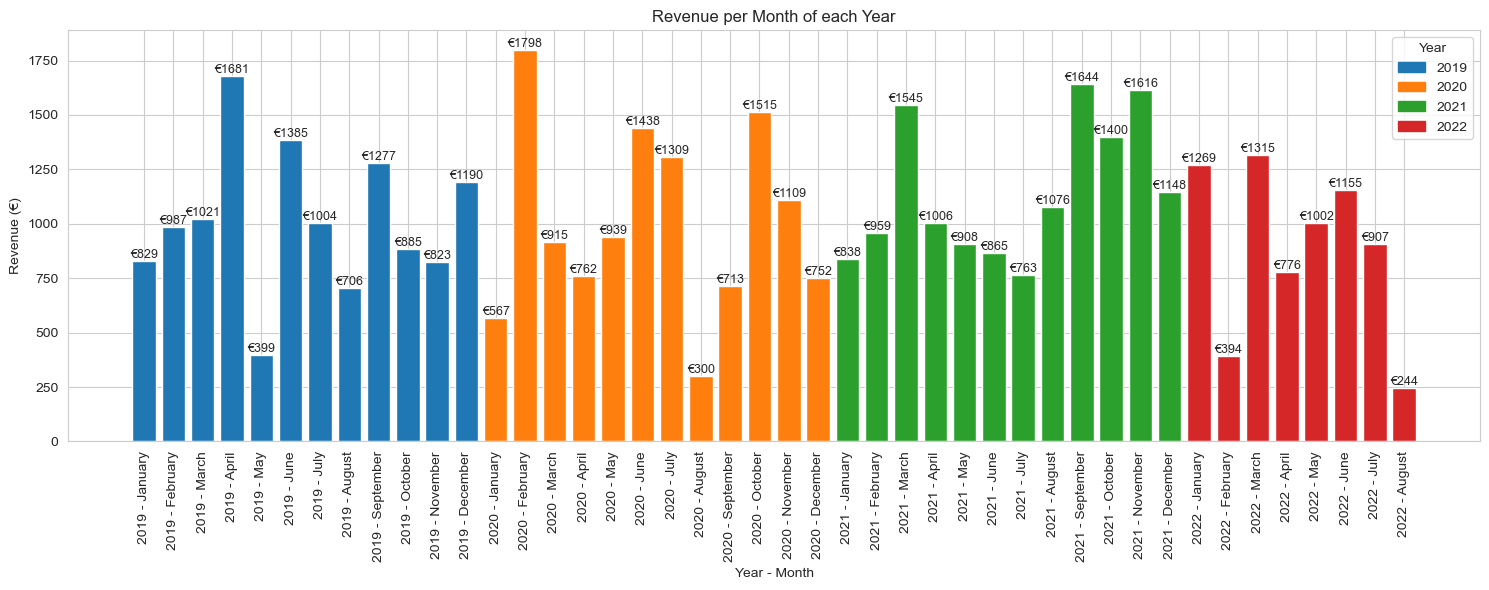

Revenue
Year Weekday   Week Day Number          
2019 Monday    1                1645.805
     Tuesday   2                1641.555
     Wednesday 3                1857.395
     Thursday  4                2005.450
     Friday    5                1426.690
     Saturday  6                2218.055
     Sunday    7                1392.215
2020 Monday    1                1385.905
     Tuesday   2                1495.235
     Wednesday 3                1990.170
     Thursday  4                1453.635
     Friday    5                2318.595
     Saturday  6                1667.780
     Sunday    7                1806.225
2021 Monday    1                1888.700
     Tuesday   2                1358.925
     Wednesday 3                1641.035
     Thursday  4                2089.150
     Friday    5                2410.930
     Saturday  6                1628.020
     Sunday    7                2749.350
2022 Monday    1                1047.880
     Tuesday   2                1087.255
     Wednesday 3                 888.500
     Thursday  4                 992.830
     Friday    5                1149.520
     Saturday  6                 688.865
     Sunday    7                1208.585

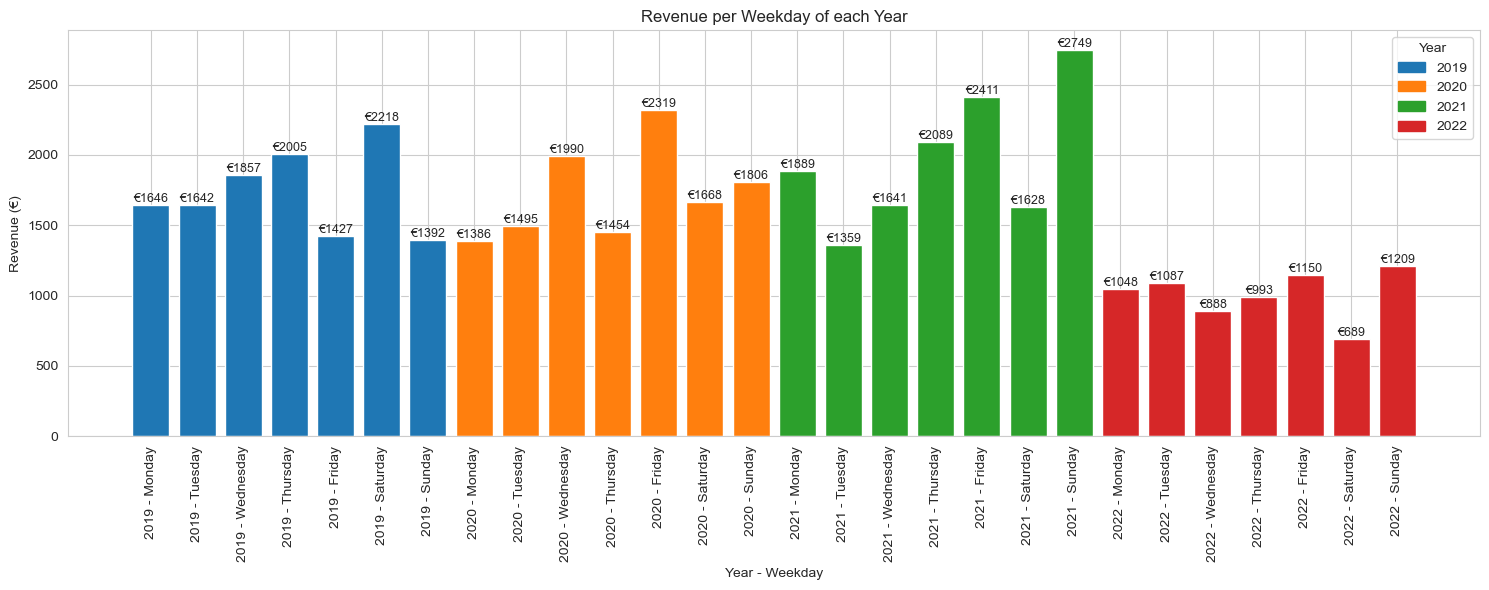

COMPARE EACH MONTH ACROSS THE YEARS:


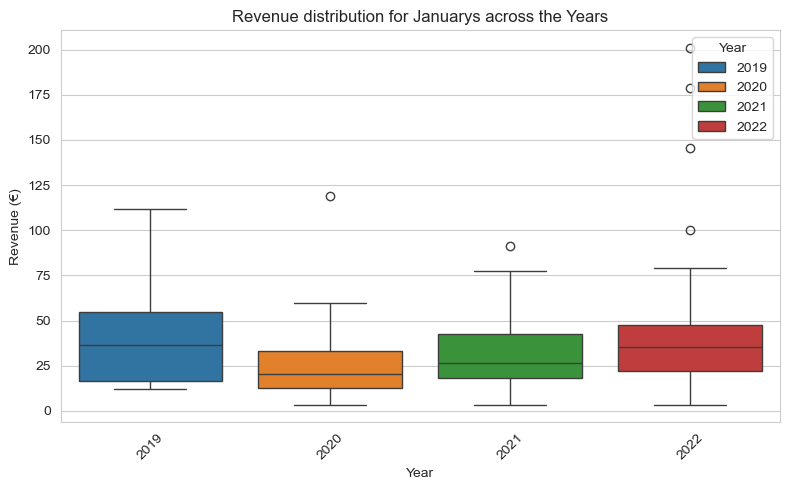

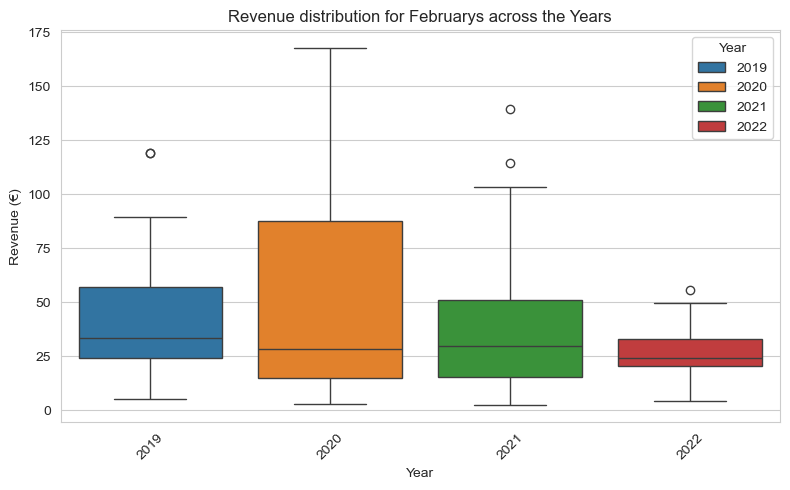

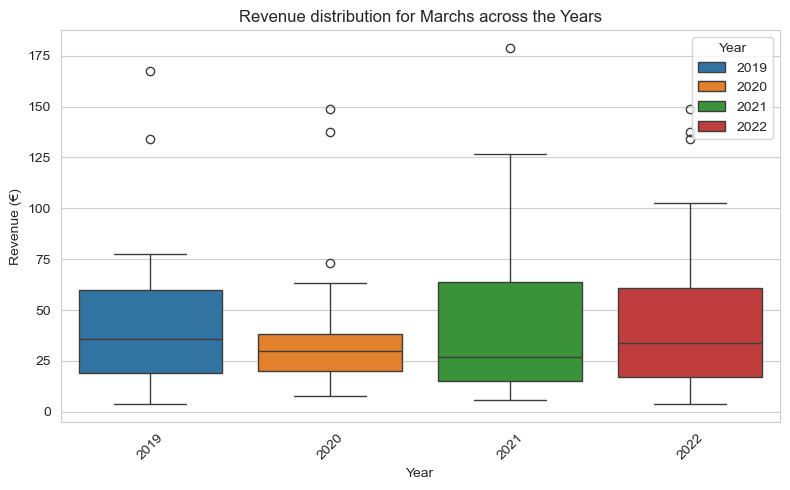

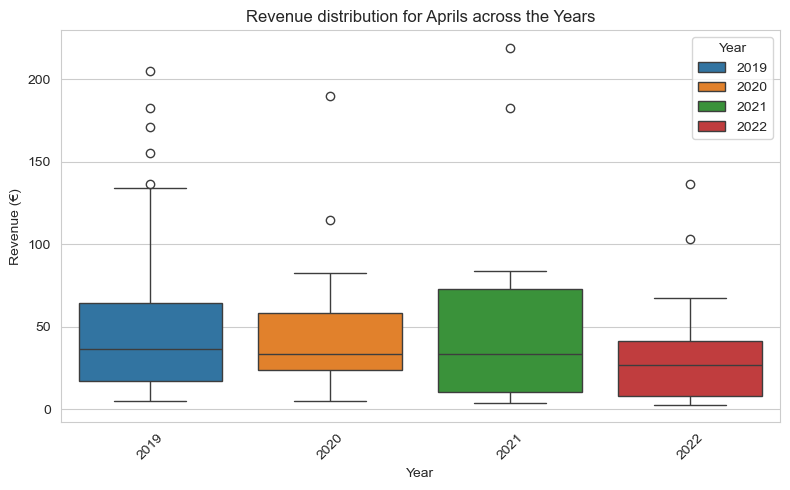

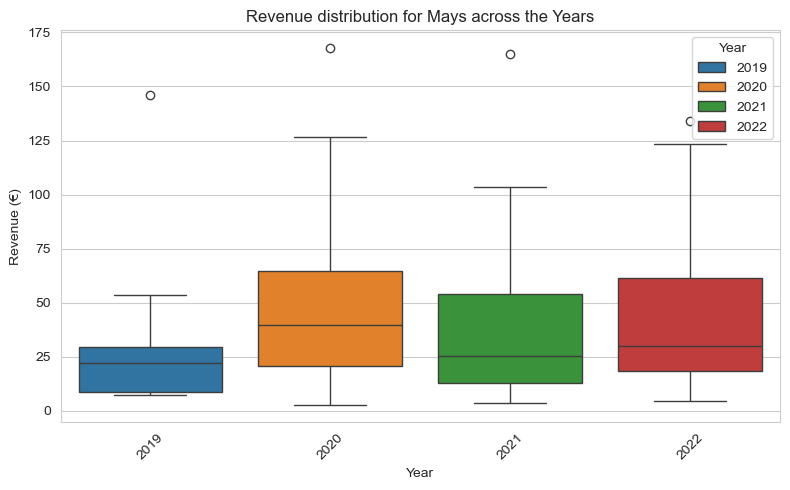

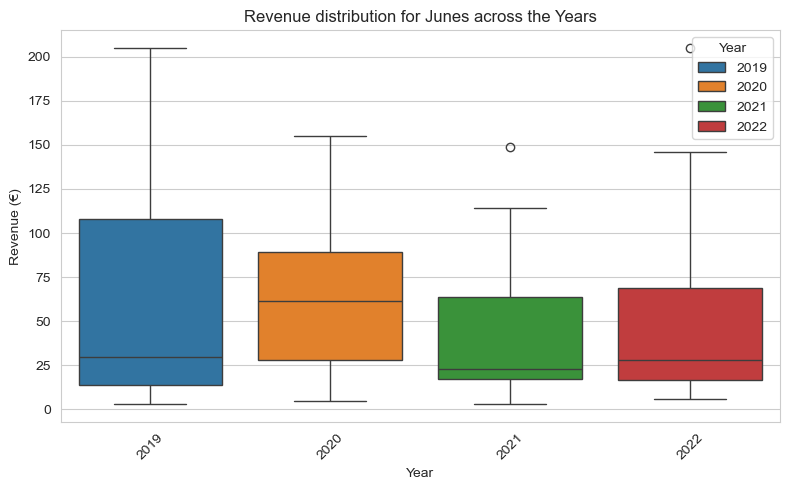

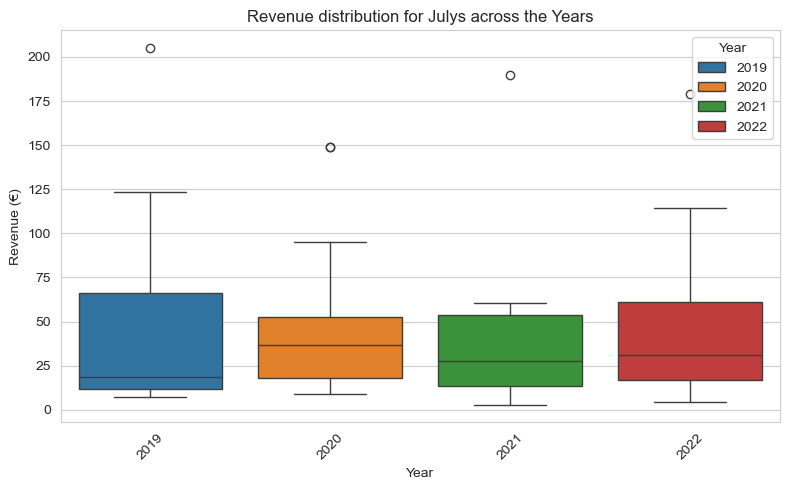

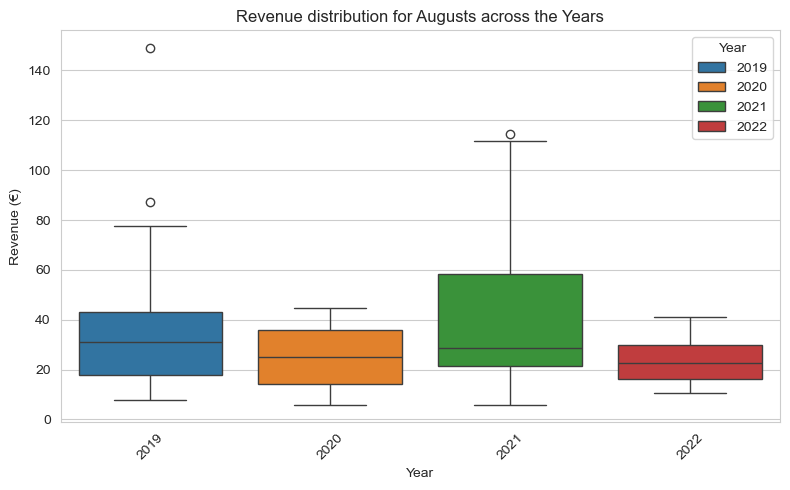

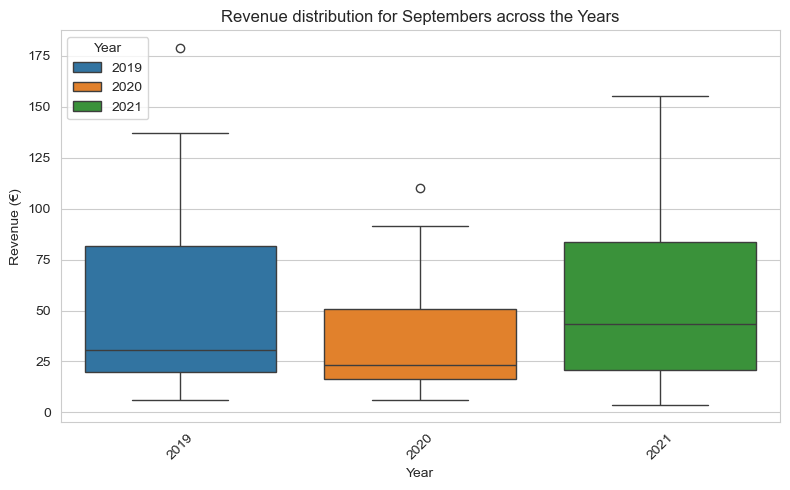

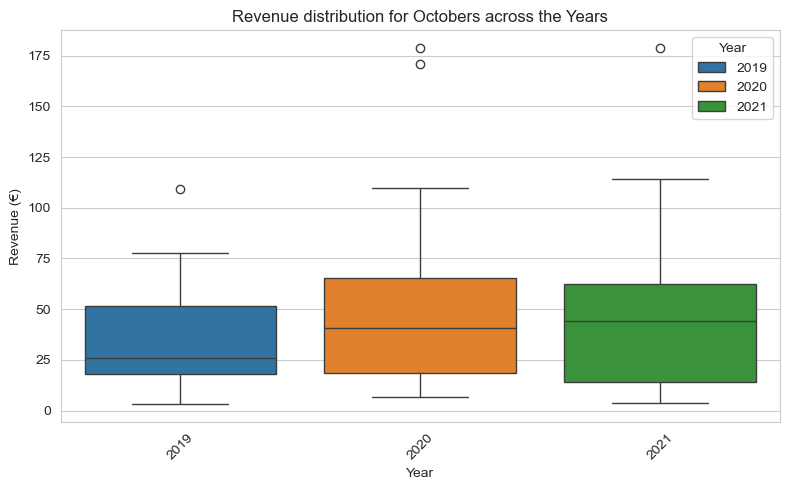

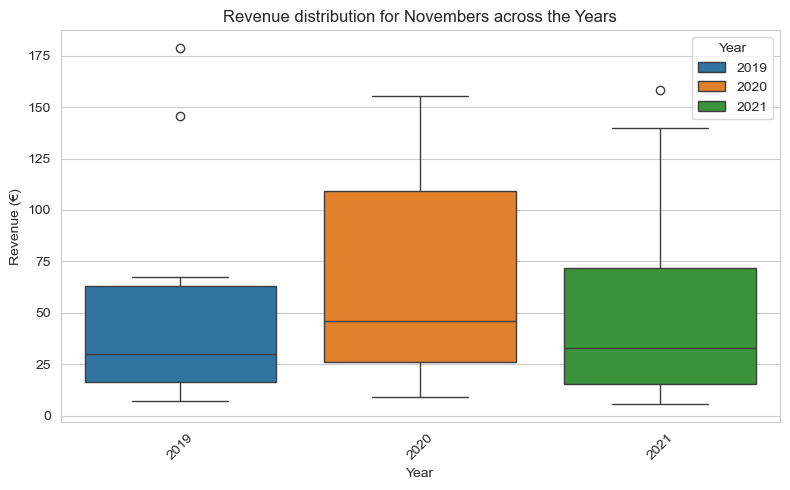

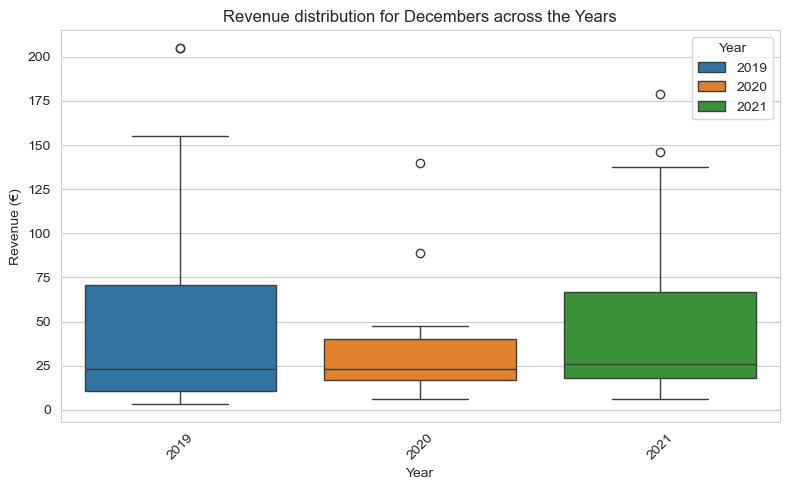

COMPARE EACH WEEKDAY ACROSS THE YEARS:


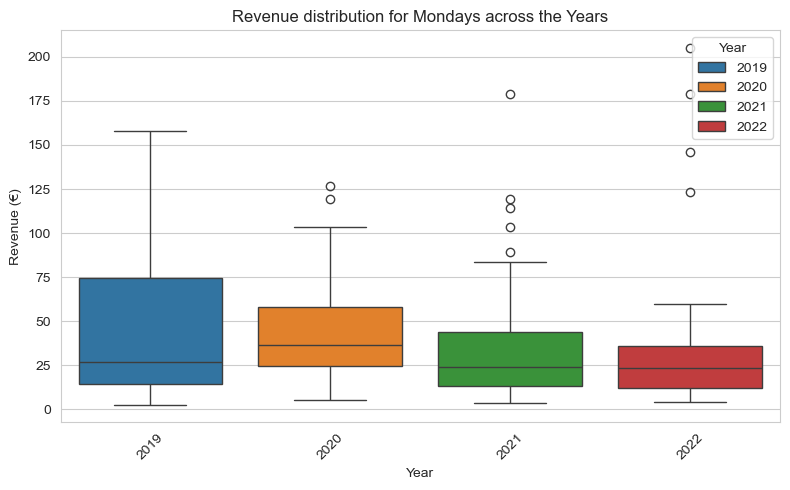

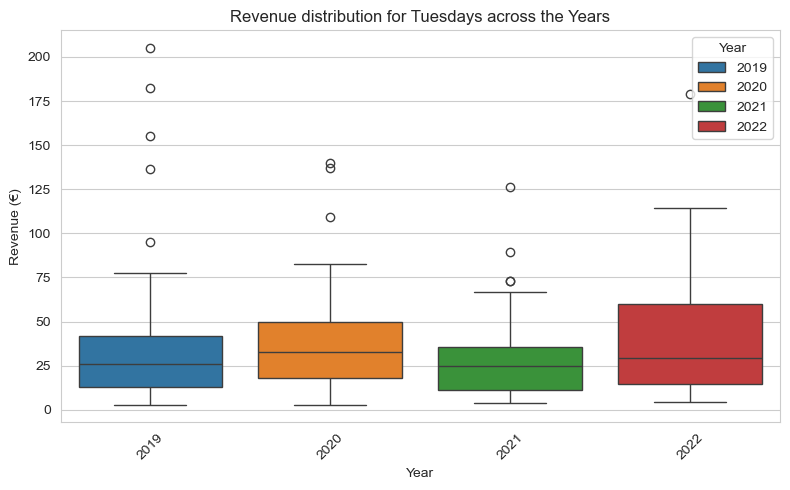

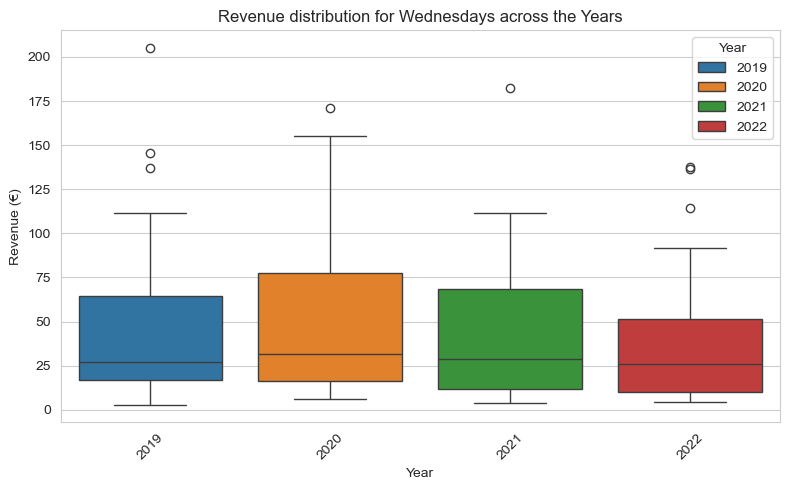

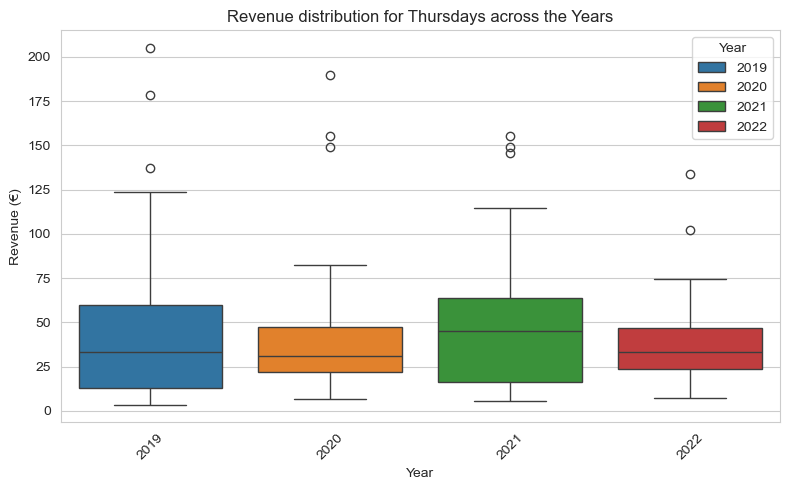

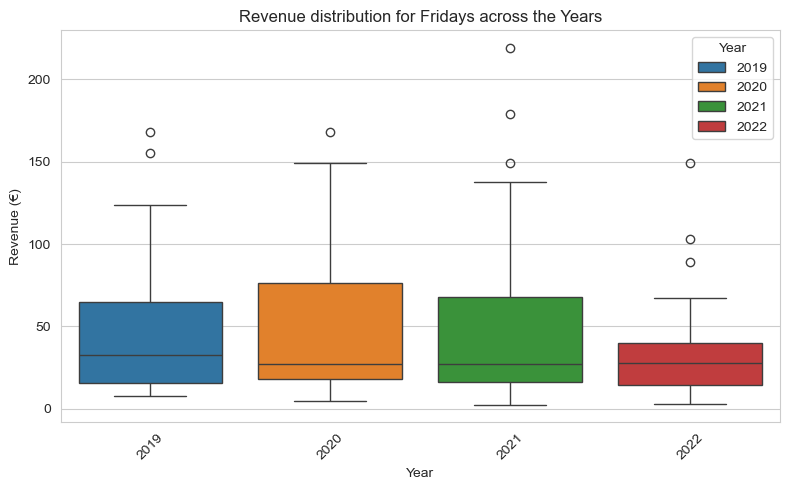

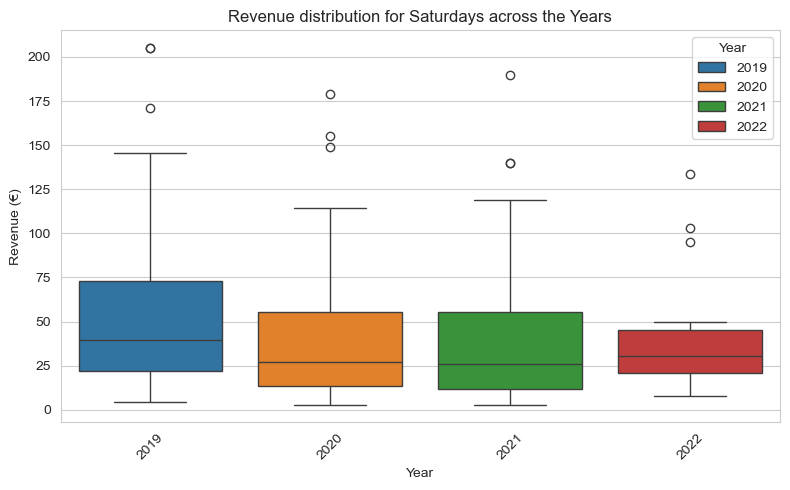

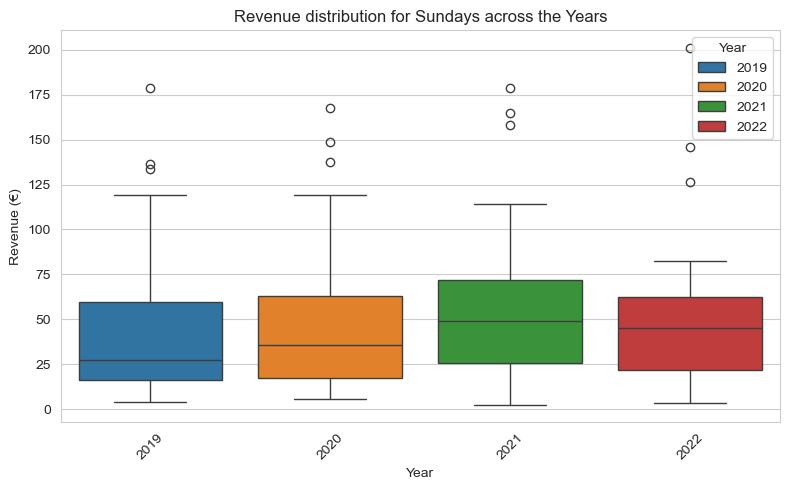

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

cleaned_data=pd.read_csv('orders_clean.csv',low_memory=False)

# cleaned_data['Order Date'] = pd.to_datetime(cleaned_data['Order Date'])
cleaned_data['Week Day Number'] = pd.to_datetime(cleaned_data['Order Date']).dt.weekday+1
cleaned_data['Month Name'] = pd.to_datetime(cleaned_data['Order Date']).dt.month_name()

display(cleaned_data)
#================================================================================================================================================================================================================================================================================================

# monthly_analytics
monthly_analytics = (
    cleaned_data.groupby(['Year', 'Month', 'Month Name'])[['Revenue']]
    .sum()
    .sort_values(by=['Year', 'Month'], ascending=True)
)

display(monthly_analytics)

df = monthly_analytics.reset_index()
metric = 'Revenue'

# Assign a unique color per Year
unique_years = sorted(df['Year'].unique())
color_map = {year: plt.cm.tab10(i) for i, year in enumerate(unique_years)}
colors = [color_map[y] for y in df['Year']]

# X-axis labels like "2020 - Monday"
x_labels = [f"{y} - {wd}" for y, wd in zip(df['Year'], df['Month Name'])]
x_pos = range(len(x_labels))

# Plot bars
plt.figure(figsize=(15, 6))
bars = plt.bar(x_pos, df[metric], color=colors)

# Add value labels on top of bars with €
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'€{height:.0f}', ha='center', va='bottom', fontsize=9)

# Make x-axis labels vertical
plt.xticks(x_pos, x_labels, rotation=90)

# Y-axis label with €
plt.xlabel("Year - Month")
plt.ylabel(f"{metric} (€)")
plt.title(f"{metric} per Month of each Year")

# Add legend for colors
handles = [mpatches.Patch(color=color_map[y], label=str(y)) for y in unique_years]
plt.legend(handles=handles, title="Year")

plt.tight_layout()
plt.show()

#================================================================================================
#================================================================================================
#================================================================================================
#================================================================================================

# weekday_analytics
weekday_analytics = (
    cleaned_data.groupby(['Year', 'Weekday', 'Week Day Number' ])[['Revenue']]
    .sum()
    .sort_values(by=['Year', 'Week Day Number'], ascending=True)
)

display(weekday_analytics)

df = weekday_analytics.reset_index()
metric = 'Revenue'

# Assign a unique color per Year
unique_years = sorted(df['Year'].unique())
color_map = {year: plt.cm.tab10(i) for i, year in enumerate(unique_years)}
colors = [color_map[y] for y in df['Year']]

# X-axis labels like "2020 - Monday"
x_labels = [f"{y} - {wd}" for y, wd in zip(df['Year'], df['Weekday'])]
x_pos = range(len(x_labels))

# Plot bars
plt.figure(figsize=(15, 6))
bars = plt.bar(x_pos, df[metric], color=colors)

# Add value labels on top of bars with €
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'€{height:.0f}', ha='center', va='bottom', fontsize=9)

# Make x-axis labels vertical
plt.xticks(x_pos, x_labels, rotation=90)

# Y-axis label with €
plt.xlabel("Year - Weekday")
plt.ylabel(f"{metric} (€)")
plt.title(f"{metric} per Weekday of each Year")

# Add legend for colors
handles = [mpatches.Patch(color=color_map[y], label=str(y)) for y in unique_years]
plt.legend(handles=handles, title="Year")

plt.tight_layout()
plt.show()

#================================================================================================================================================================================================================================================================================================


# Compare all months for each year

# Use seaborn style
sns.set_style('whitegrid')

print('COMPARE EACH MONTH ACROSS THE YEARS:')

# List of months in order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Loop over months and create boxplots
for month in months_order:
    plt.figure(figsize=(8,5))
    
    # Filter data for the current month
    month_data = cleaned_data[cleaned_data['Month Name'] == month]
    
    # Boxplot: x=Year, y=Revenue
    sns.boxplot(x='Year', y='Revenue',hue='Year', data=month_data, palette='tab10')
    
    plt.title(f'Revenue distribution for {month}s across the Years')
    plt.xlabel('Year')
    plt.ylabel('Revenue (€)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#================================================================================================
#================================================================================================
#================================================================================================
#================================================================================================

# Compare all weekdays for each year
sns.set_style('whitegrid')

print('COMPARE EACH WEEKDAY ACROSS THE YEARS:')

# List of weekdays in order
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Loop over weekdays and create boxplots
for weekday in weekdays_order:
    plt.figure(figsize=(8,5))
    
    # Filter data for the current weekday
    weekday_data = cleaned_data[cleaned_data['Weekday'] == weekday]
    
    # Boxplot: x=Year, y=Revenue
    sns.boxplot(x='Year', y='Revenue', hue='Year', data=weekday_data, palette='tab10')
    
    plt.title(f'Revenue distribution for {weekday}s across the Years')
    plt.xlabel('Year')
    plt.ylabel('Revenue (€)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()